In [1]:
import keras
from keras import layers

In [2]:
bottleNeck_dim = 64
initial_shape = 784
input_img = keras.Input(shape=(initial_shape, ))

# encoding layer
enc_l = layers.Dense(bottleNeck_dim, activation='relu')(input_img)

#decode layer
dec_l = layers.Dense(initial_shape, activation='sigmoid')(enc_l)

# autoencoder 
autoencoder = keras.Model(input_img, dec_l)

In [3]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [4]:
# data
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train.dtype

dtype('float64')

In [6]:
print(x_train.shape)
x_train = x_train.reshape((len(x_train), x_train.shape[1] * x_train.shape[2]))

(60000, 28, 28)


In [7]:
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [8]:
print(x_test.shape)

(10000, 784)


In [9]:
autoencoder.fit(x_train, x_train, epochs=50, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/50
1875/1875 [==============================] - 7s 2ms/step - loss: 0.1364 - val_loss: 0.0906
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0837 - val_loss: 0.0781
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0773 - val_loss: 0.0752
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0755 - val_loss: 0.0745
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0748 - val_loss: 0.0739
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0744 - val_loss: 0.0736
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0742 - val_loss: 0.0734
Epoch 8/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0740 - val_loss: 0.0733
Epoch 9/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0739 - val_loss: 0.0732
Epoch 10/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.073

In [10]:
decoded_imgs = autoencoder.predict(x_test)

313/313 [==============================] - 1s 2ms/step


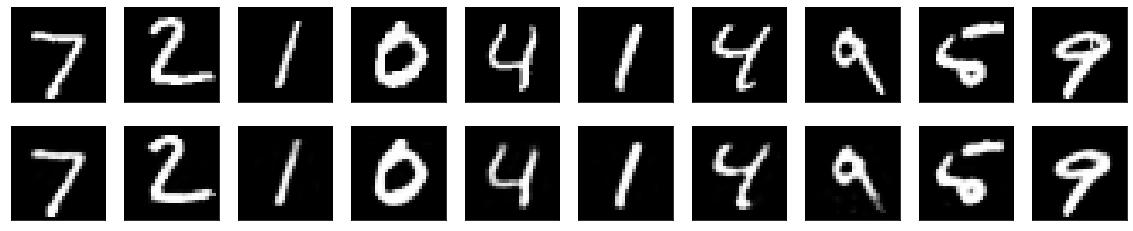

In [11]:
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
